Data spans from 1976-05-31 to 2025-02-13
Total number of data points: 1780
Number of missing values: 13

Basic Statistics (Filtered Values):
North Pole - Mean: 0.57, Min: -117.00, Max: 111.00
South Pole - Mean: -0.24, Min: -130.00, Max: 149.00


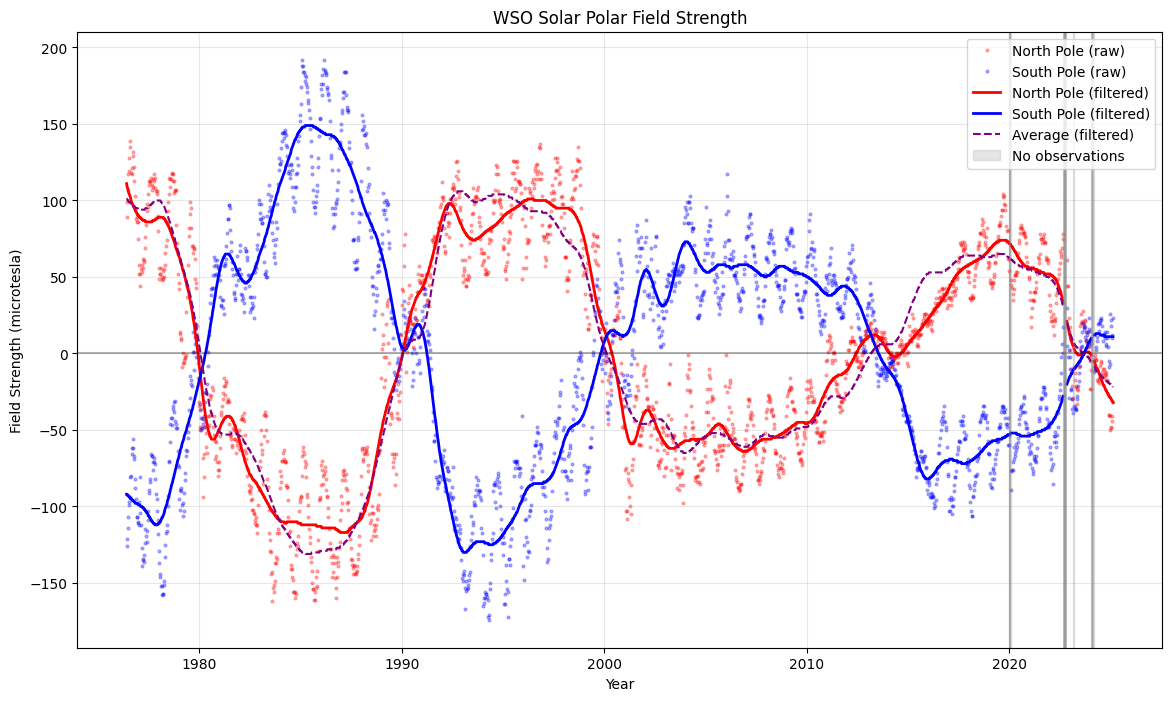

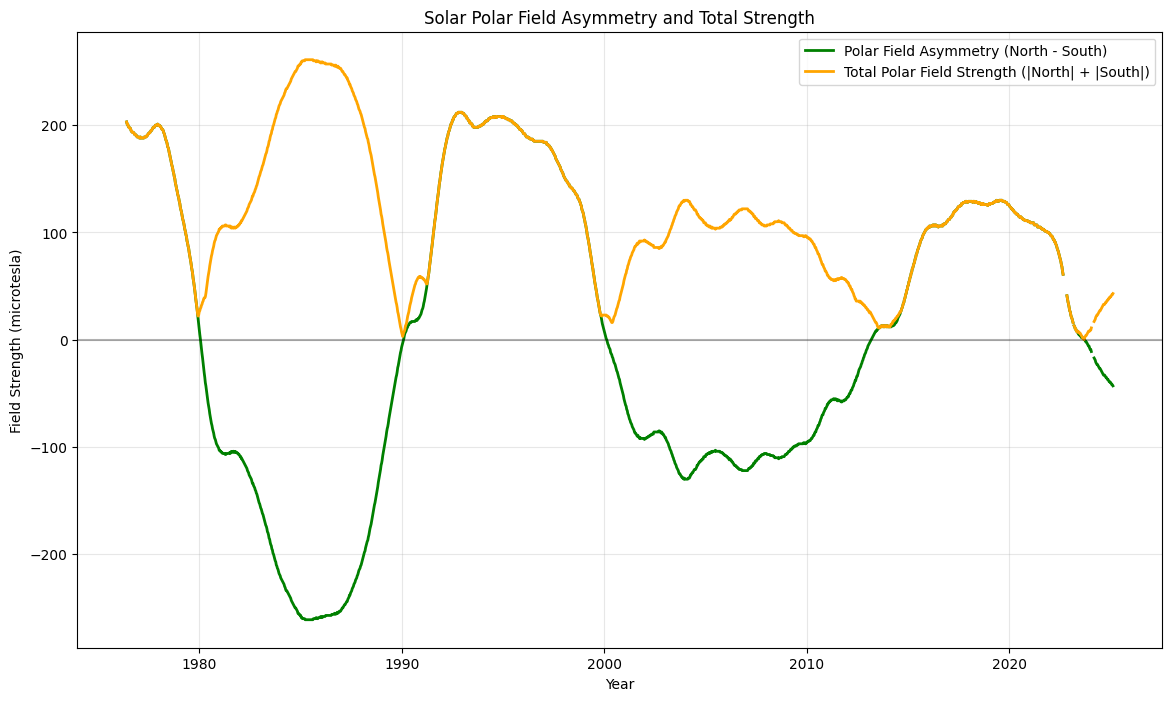

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import re

# Read the data file
def parse_wso_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Skip header or non-data lines
            if not (line.startswith('19') or line.startswith('20')):
                continue
                
            # Extract components
            parts = line.split()
            if len(parts) >= 9:  # Ensure we have enough parts
                date_str = parts[0].split('_')[0]
                date = datetime.strptime(date_str, '%Y:%m:%d')
                
                # Handle null values (XXX)
                north = np.nan if 'XXXN' in parts[1] else float(parts[1].replace('N', ''))
                south = np.nan if 'XXXS' in parts[2] else float(parts[2].replace('S', ''))
                avg = np.nan if 'XXXAvg' in parts[3] else float(parts[3].replace('Avg', ''))
                
                north_f = np.nan if 'XXXNf' in parts[6] else float(parts[6].replace('Nf', ''))
                south_f = np.nan if 'XXXSf' in parts[7] else float(parts[7].replace('Sf', ''))
                avg_f = np.nan if 'XXXAvgf' in parts[8] else float(parts[8].replace('Avgf', ''))
                
                data.append([date, north, south, avg, north_f, south_f, avg_f])
    
    # Create DataFrame
    df = pd.DataFrame(data, columns=['Date', 'North', 'South', 'Avg', 'North_filt', 'South_filt', 'Avg_filt'])
    return df

# Plot the polar field data
def plot_polar_fields(df, title="WSO Solar Polar Field Strength"):
    plt.figure(figsize=(14, 8))
    
    # Plot raw data with small markers
    plt.plot(df['Date'], df['North'], 'o', color='red', markersize=2, alpha=0.3, label='North Pole (raw)')
    plt.plot(df['Date'], df['South'], 'o', color='blue', markersize=2, alpha=0.3, label='South Pole (raw)')
    
    # Plot filtered data with lines
    plt.plot(df['Date'], df['North_filt'], '-', color='red', linewidth=2, label='North Pole (filtered)')
    plt.plot(df['Date'], df['South_filt'], '-', color='blue', linewidth=2, label='South Pole (filtered)')
    plt.plot(df['Date'], df['Avg_filt'], '--', color='purple', linewidth=1.5, label='Average (filtered)')
    
    # Add zero line
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    
    # Highlight periods with missing data (if any)
    missing_data = df[df['North'].isna()]['Date']
    for date in missing_data:
        plt.axvline(x=date, color='gray', alpha=0.3)
    
    # If there's a significant gap (Dec 2019 - Feb 2020)
    try:
        missing_start = datetime(2019, 12, 19)
        missing_end = datetime(2020, 2, 5)
        plt.axvspan(missing_start, missing_end, color='gray', alpha=0.2, label='No observations')
    except:
        pass  # Skip if dates are out of the data range
    
    plt.legend(loc='upper right')
    plt.title(title)
    plt.ylabel('Field Strength (microtesla)')
    plt.xlabel('Year')
    plt.grid(True, alpha=0.3)
    return plt

# Plot the polar field strength difference and sum
def plot_polar_field_difference(df):
    plt.figure(figsize=(14, 8))
    
    # Calculate difference (North - South) and sum (|North| + |South|)
    df['Difference'] = df['North_filt'] - df['South_filt']
    df['Sum'] = df['North_filt'].abs() + df['South_filt'].abs()
    
    plt.plot(df['Date'], df['Difference'], '-', color='green', linewidth=2, 
             label='Polar Field Asymmetry (North - South)')
    plt.plot(df['Date'], df['Sum'], '-', color='orange', linewidth=2, 
             label='Total Polar Field Strength (|North| + |South|)')
    
    # Add zero line
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    
    plt.legend(loc='upper right')
    plt.title('Solar Polar Field Asymmetry and Total Strength')
    plt.ylabel('Field Strength (microtesla)')
    plt.xlabel('Year')
    plt.grid(True, alpha=0.3)
    return plt

# Main function to analyze the data
def analyze_wso_data(file_path):
    df = parse_wso_data(file_path)
    
    print(f"Data spans from {df['Date'].min().date()} to {df['Date'].max().date()}")
    print(f"Total number of data points: {len(df)}")
    print(f"Number of missing values: {df['North'].isna().sum()}")
    
    # Basic statistics
    print("\nBasic Statistics (Filtered Values):")
    print(f"North Pole - Mean: {df['North_filt'].mean():.2f}, Min: {df['North_filt'].min():.2f}, Max: {df['North_filt'].max():.2f}")
    print(f"South Pole - Mean: {df['South_filt'].mean():.2f}, Min: {df['South_filt'].min():.2f}, Max: {df['South_filt'].max():.2f}")
    
    # Create plots
    plot1 = plot_polar_fields(df)
    plot1.savefig('wso_polar_fields.png', dpi=300, bbox_inches='tight')
    
    plot2 = plot_polar_field_difference(df)
    plot2.savefig('wso_field_asymmetry.png', dpi=300, bbox_inches='tight')
    
    plt.show()
    
    return df

# Run the analysis
if __name__ == "__main__":
    df = analyze_wso_data("wso.txt")

/var/folders/3b/_yf5sn_d3117s6k84tdmk97m0000gn/T/ipykernel_60155/165148510.py:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Correlation Matrix:
           WSO_Sum  WSO_Diff       SSN       TSI
WSO_Sum   1.000000 -0.026072 -0.462328 -0.546644
WSO_Diff -0.026072  1.000000 -0.077504 -0.062444
SSN      -0.462328 -0.077504  1.000000  0.935728
TSI      -0.546644 -0.062444  0.935728  1.000000


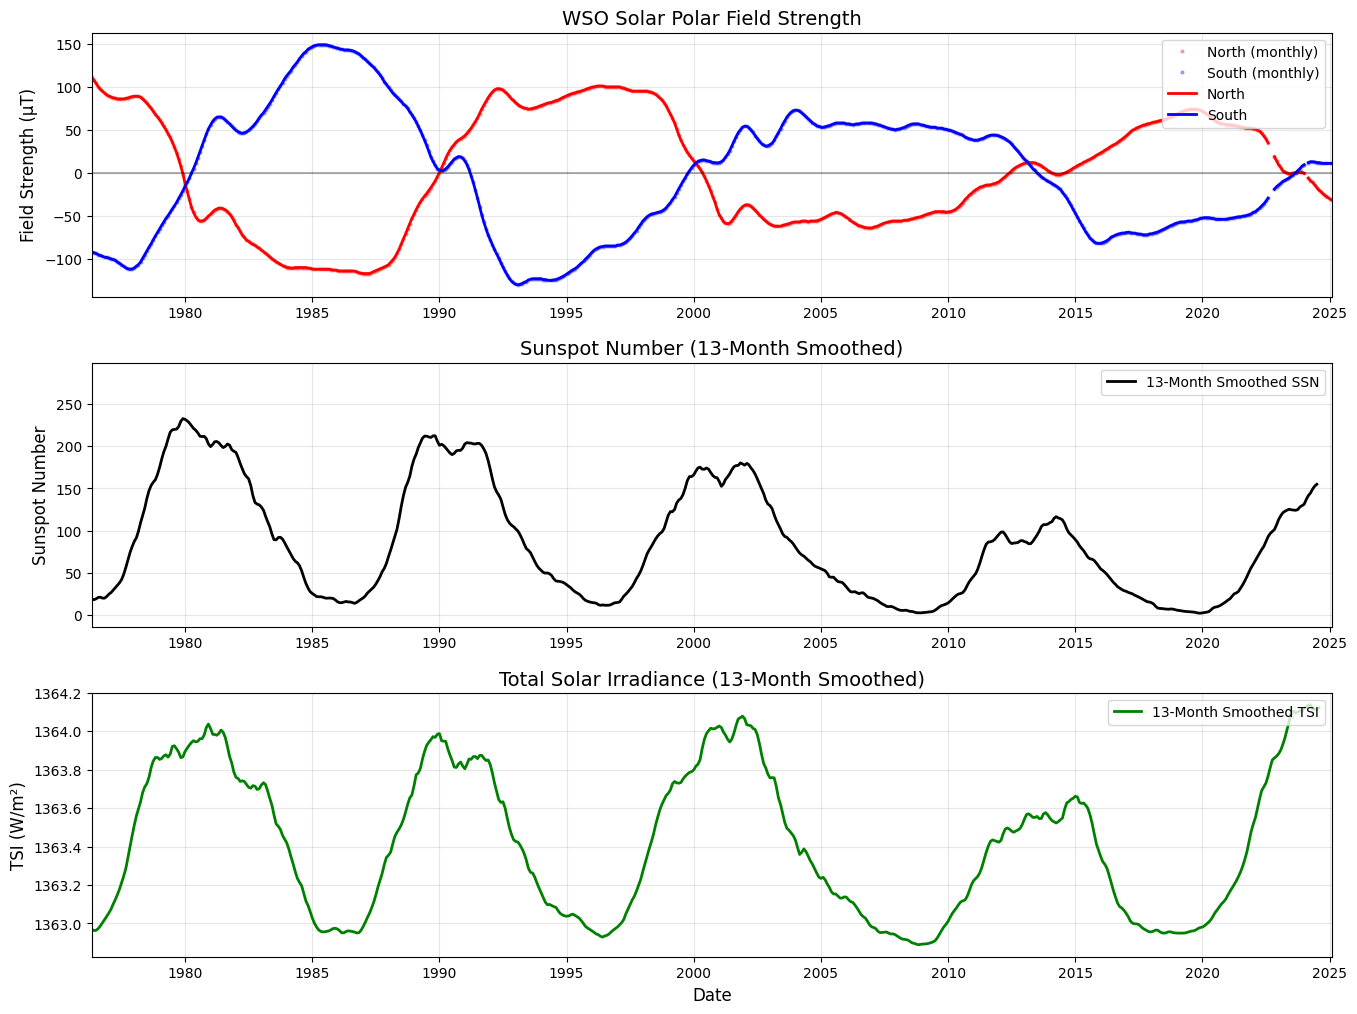

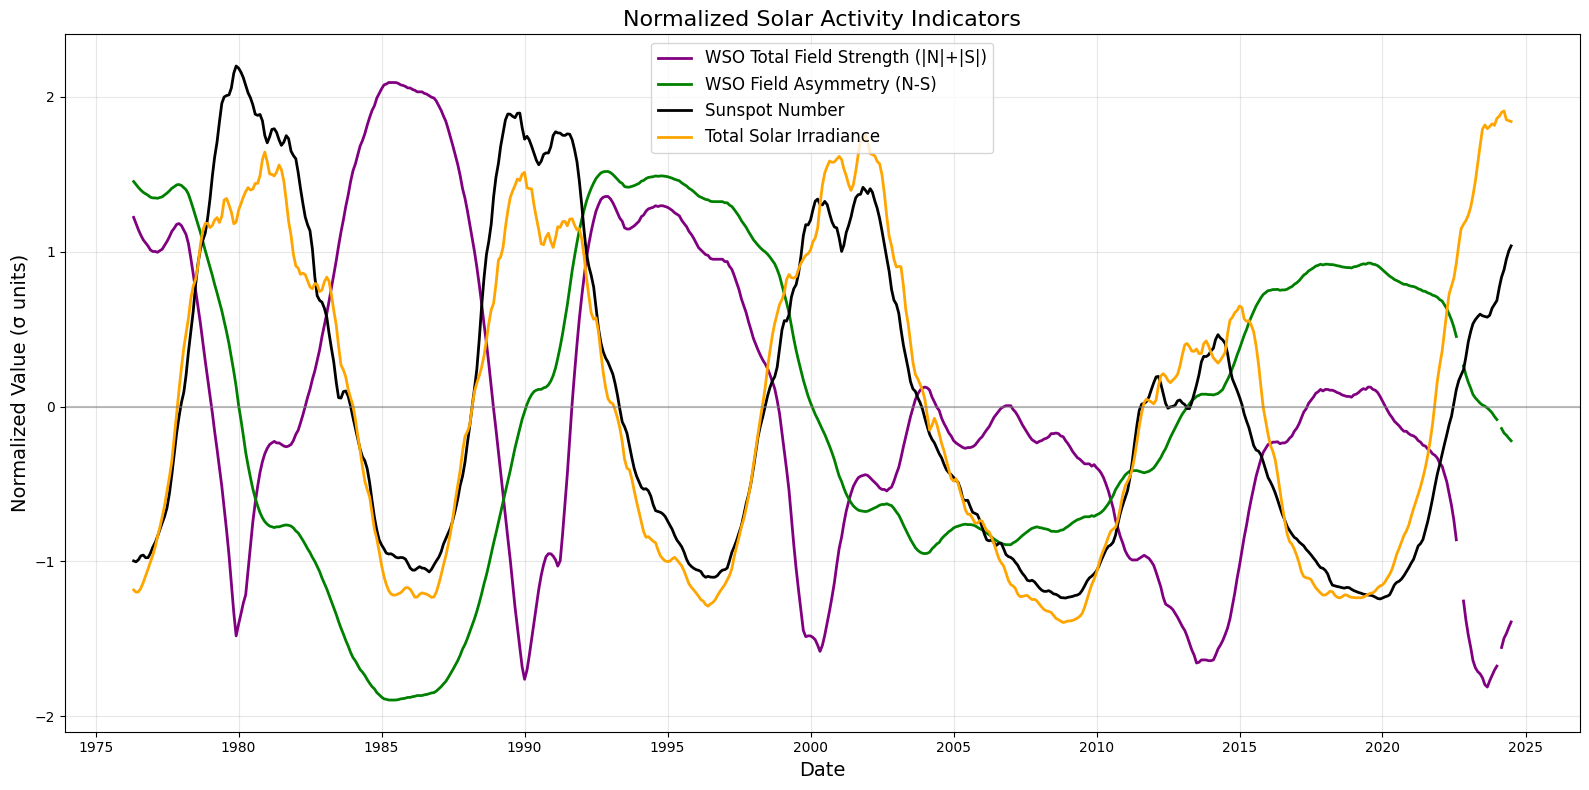

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec

# Function to parse WSO data
def parse_wso_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Skip header or non-data lines
            if not (line.startswith('19') or line.startswith('20')):
                continue
                
            # Extract components
            parts = line.split()
            if len(parts) >= 9:  # Ensure we have enough parts
                date_str = parts[0].split('_')[0]
                date = datetime.strptime(date_str, '%Y:%m:%d')
                
                # Handle null values (XXX)
                north = np.nan if 'XXXN' in parts[1] else float(parts[1].replace('N', ''))
                south = np.nan if 'XXXS' in parts[2] else float(parts[2].replace('S', ''))
                avg = np.nan if 'XXXAvg' in parts[3] else float(parts[3].replace('Avg', ''))
                
                north_f = np.nan if 'XXXNf' in parts[6] else float(parts[6].replace('Nf', ''))
                south_f = np.nan if 'XXXSf' in parts[7] else float(parts[7].replace('Sf', ''))
                avg_f = np.nan if 'XXXAvgf' in parts[8] else float(parts[8].replace('Avgf', ''))
                
                data.append([date, north, south, avg, north_f, south_f, avg_f])
    
    # Create DataFrame
    df = pd.DataFrame(data, columns=['Date', 'North', 'South', 'Avg', 'North_filt', 'South_filt', 'Avg_filt'])
    return df

# Load and process WSO data
wso_df = parse_wso_data("wso.txt")
wso_df.set_index('Date', inplace=True)
wso_df.index = pd.to_datetime(wso_df.index)

# Create additional metrics
wso_df['Difference'] = wso_df['North_filt'] - wso_df['South_filt']
wso_df['Sum'] = np.abs(wso_df['North_filt']) + np.abs(wso_df['South_filt'])

# Resample to monthly data (first day of each month)
wso_monthly = wso_df.resample('MS').mean()

# Load the pre-smoothed sunspot data
ssn_data = pd.read_csv("sunspot.csv")
# Create date index from year and month
ssn_data['date'] = pd.to_datetime(ssn_data[['year', 'month']].assign(day=1))
ssn_data.set_index('date', inplace=True)

# Load the pre-smoothed TSI data
tsi_data = pd.read_csv("tsi.csv")
# Create date index from year and month
tsi_data['date'] = pd.to_datetime(tsi_data[['year', 'month']].assign(day=1))
tsi_data.set_index('date', inplace=True)

# Create multi-panel plot
fig = plt.figure(figsize=(16, 12))
gs = GridSpec(3, 1, height_ratios=[1, 1, 1], hspace=0.25)

# Plot 1: WSO Polar Field Data
ax1 = fig.add_subplot(gs[0])
ax1.plot(wso_monthly.index, wso_monthly['North_filt'], 'o', color='red', markersize=2, alpha=0.3, label='North (monthly)')
ax1.plot(wso_monthly.index, wso_monthly['South_filt'], 'o', color='blue', markersize=2, alpha=0.3, label='South (monthly)')
ax1.plot(wso_monthly.index, wso_monthly['North_filt'], '-', color='red', linewidth=2, label='North')
ax1.plot(wso_monthly.index, wso_monthly['South_filt'], '-', color='blue', linewidth=2, label='South')
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.set_ylabel('Field Strength (µT)', fontsize=12)
ax1.set_title('WSO Solar Polar Field Strength', fontsize=14)
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Plot 2: Sunspot Number
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax2.plot(ssn_data.index, ssn_data['ssn'], '-', color='black', linewidth=2, label='13-Month Smoothed SSN')
ax2.set_ylabel('Sunspot Number', fontsize=12)
ax2.set_title('Sunspot Number (13-Month Smoothed)', fontsize=14)
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# Plot 3: TSI Data
ax3 = fig.add_subplot(gs[2], sharex=ax1)
ax3.plot(tsi_data.index, tsi_data['tsi'], '-', color='green', linewidth=2, label='13-Month Smoothed TSI')
ax3.set_ylabel('TSI (W/m²)', fontsize=12)
ax3.set_title('Total Solar Irradiance (13-Month Smoothed)', fontsize=14)
ax3.legend(loc='upper right')
ax3.grid(True, alpha=0.3)

# Set common x-axis label and formatting
ax3.set_xlabel('Date', fontsize=12)

# Find common date range where we have both WSO and sunspot data
min_wso_date = wso_monthly.index.min()
max_wso_date = wso_monthly.index.max()

# Set the x-axis limits to focus on the WSO data period
for ax in [ax1, ax2, ax3]:
    ax.set_xlim(min_wso_date, max_wso_date)
    ax.xaxis.set_major_locator(mdates.YearLocator(5))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()

# Create a second plot with normalized values for comparison
# This helps see the relationships between the different indicators

# Create a common date range where all three datasets exist
common_start = max(wso_monthly.index.min(), ssn_data.index.min(), tsi_data.index.min())
common_end = min(wso_monthly.index.max(), ssn_data.index.max(), tsi_data.index.max())

# Filter each dataset to the common date range
wso_filtered = wso_monthly.loc[common_start:common_end]
ssn_filtered = ssn_data.loc[common_start:common_end]
tsi_filtered = tsi_data.loc[common_start:common_end]

# Normalize each dataset for easier comparison
wso_sum_norm = (wso_filtered['Sum'] - wso_filtered['Sum'].mean()) / wso_filtered['Sum'].std()
wso_diff_norm = (wso_filtered['Difference'] - wso_filtered['Difference'].mean()) / wso_filtered['Difference'].std()
ssn_norm = (ssn_filtered['ssn'] - ssn_filtered['ssn'].mean()) / ssn_filtered['ssn'].std()
tsi_norm = (tsi_filtered['tsi'] - tsi_filtered['tsi'].mean()) / tsi_filtered['tsi'].std()

# Create a new figure for normalized values
plt.figure(figsize=(16, 8))

plt.plot(wso_filtered.index, wso_sum_norm, '-', color='purple', linewidth=2, 
         label='WSO Total Field Strength (|N|+|S|)')
plt.plot(wso_filtered.index, wso_diff_norm, '-', color='green', linewidth=2, 
         label='WSO Field Asymmetry (N-S)')
plt.plot(ssn_filtered.index, ssn_norm, '-', color='black', linewidth=2, 
         label='Sunspot Number')
plt.plot(tsi_filtered.index, tsi_norm, '-', color='orange', linewidth=2, 
         label='Total Solar Irradiance')

plt.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
plt.title('Normalized Solar Activity Indicators', fontsize=16)
plt.ylabel('Normalized Value (σ units)', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(True, alpha=0.3)

# Set x-axis formatting
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Create correlation matrix for the common period
correlation_data = pd.DataFrame({
    'WSO_Sum': wso_sum_norm,
    'WSO_Diff': wso_diff_norm,
    'SSN': ssn_norm,
    'TSI': tsi_norm
})

correlation_matrix = correlation_data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Display the plots
plt.tight_layout()

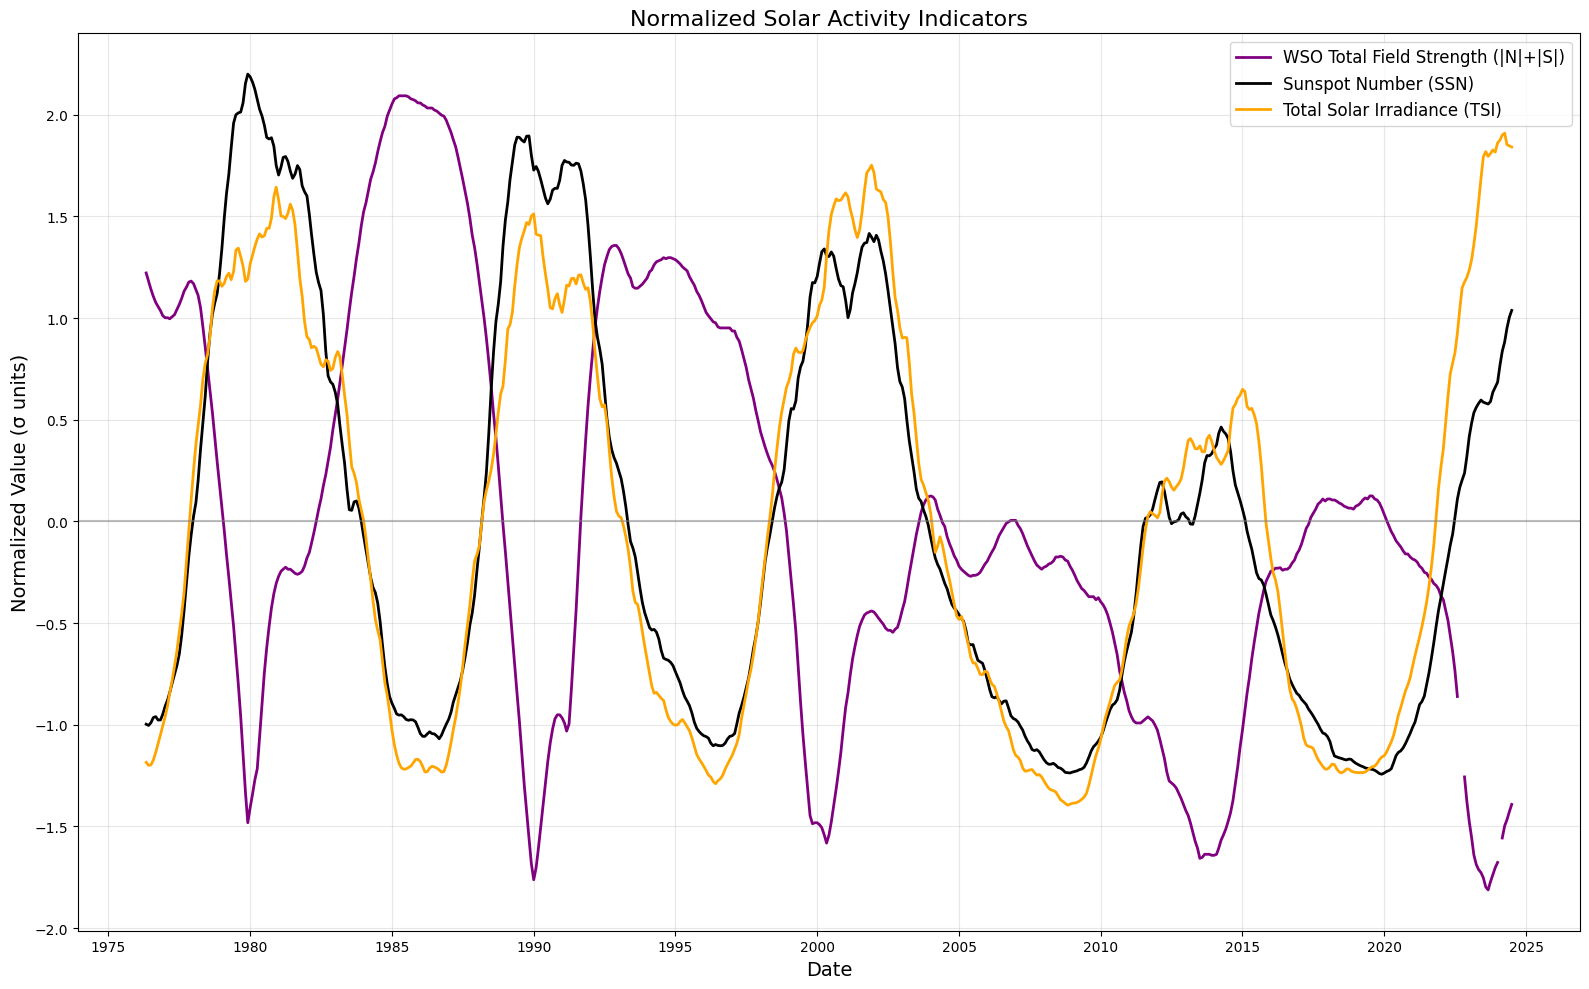

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create a figure with appropriate size
plt.figure(figsize=(16, 10))

# Plot the three normalized data series
plt.plot(wso_filtered.index, wso_sum_norm, '-', color='purple', linewidth=2, 
         label='WSO Total Field Strength (|N|+|S|)')
plt.plot(ssn_filtered.index, ssn_norm, '-', color='black', linewidth=2, 
         label='Sunspot Number (SSN)')
plt.plot(tsi_filtered.index, tsi_norm, '-', color='orange', linewidth=2, 
         label='Total Solar Irradiance (TSI)')

# Add a horizontal line at y=0
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.5)

# Add labels and title
plt.title('Normalized Solar Activity Indicators', fontsize=16)
plt.ylabel('Normalized Value (σ units)', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(True, alpha=0.3)

# Set the x-axis formatting
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()